In [3]:
import os
import warnings
import pandas as pd
import numpy as np

import pyLDAvis
import pyLDAvis.gensim_models as pyGensim
import pickle

warnings.filterwarnings("ignore")

pyLDAvis.enable_notebook()

## 토픽 개수 결정

1. Perplexity (혼잡도 평가법)
    - 특정 확률 모델이 실제로 관측되는 값을 얼마나 잘 예측하는지 평가할 때 사용
    - 확률 모델이 결과를 얼마나 정확하게 예측하는지 낮을수록 정확하게 예측 
    - 주로 사용하는 용도: (1) 토픽모델링 기법이 얼마나 빠르게 수렴하는지 확인할 때, (2) 확률 모델이 다른 모델에 비해 얼마나 개선된었는지 평가할 때, (3) 동일 모델 내 파라미터에 따른 성능 평가할 때 주로 사용 
    - 한계: Perplexity가 낮다고 해서, 결과가 해석 용이하다는 의미가 아님
2. Coherence (응집도 평가법)
    - 토픽이 얼마나 의미론적으로 일관성이 있는지 높을수록 의미론적 일관성 높음
    - 주용도: 해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인하기 위해 사용 
    - 한계: 특정 coherence가 너무 높아지면 정보의 양이 줄어들게 되고, coherence가 너무 낮아 정보들의 일관성이 없다면, 분석의 의미가 낮아지게 됨

- 따라서, 두 값을 보고 결정
- 출처: https://yumdata.tistory.com/96

- 이외 다른 평가기준: 
    -  HM 평가법 
    - 출처: https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002698207

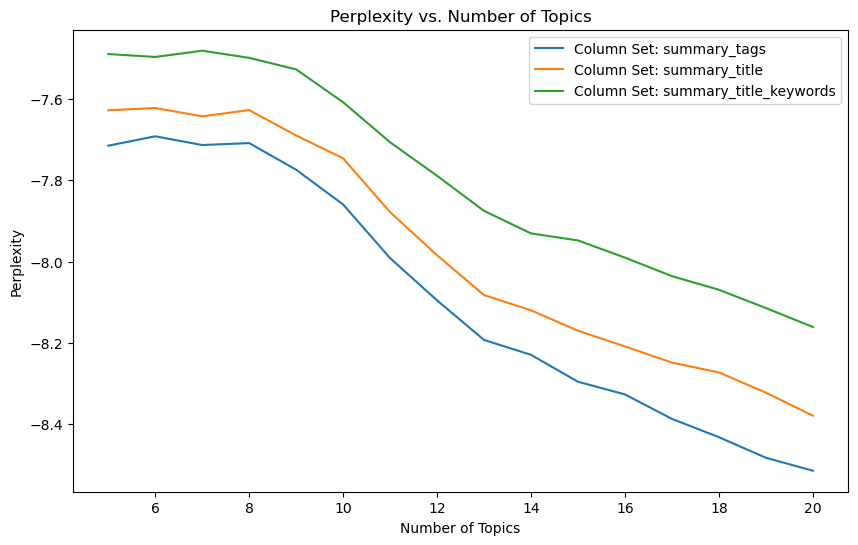

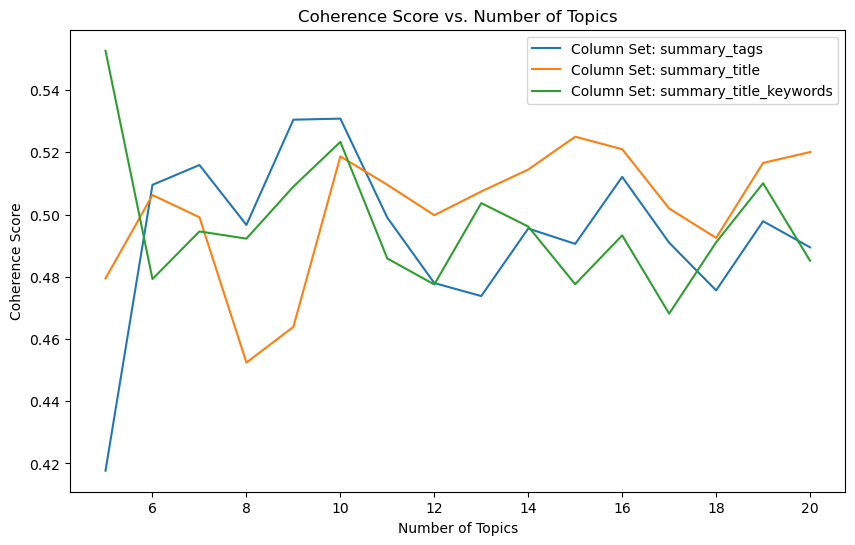

- perplexity가 마이너스 값이 나와서 결과값을 쓰기 어려움 -> Coherence score을 보기 

최종 토픽 개수 (가장 높은 Coherence score 기준)
- summary_tags: 토픽 10개
- summary_title: 토픽 15개
- summary_title_keywords: 토픽 10개 

최종: summary_tags, 토픽 10개

LDAvis 결과 해석
- 원의 크기: 토픽 단어들이 얼마나 속해있는지 
- 원의 거리: 토픽 간의 유사성 (겹치면 유사한 토픽)
- 람다 값 조정
    - 1일수록, 토픽별로 가장 자주 등장하는 키워드 우석
    - 0일수록, 토픽 간에 차이가 많이 나는 단어 선택 
    - 따라서, 0.5 선택 

In [4]:
# summary_tags
with open(file = 'topicNum_10_summary_tags.pickle', mode = 'rb') as f:
    lda = pickle.load(f)
    ldaModel = lda[0]
    dictionary = lda[1]
    corpus = lda[2]

    vis = pyGensim.prepare(ldaModel, corpus, dictionary)

pyLDAvis.display(vis)